# Music Dataset

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Exploration: Load and Review Dataset

In [2]:
music = pd.read_csv('Music_Genre.csv')

In [3]:
print("Dimensions of the Music dataset: {}".format(music.shape)) 
# Check number of columns (attributes) and rows (instances) in the data frame

Dimensions of the Music dataset: (7938, 22)


In [4]:
music.head()

,Song_popularity,Artist_popularity,Duration,Bars_confidence,Bars_start,Beats_confidence,Beats_start,End_of_fade_in,Familiarity,Key,...,Mode,Mode_confidence,Start_of_fade_out,Tatums_confidence,Tatums_start,Tempo,Terms_freq,Time_signature,Time_signature_confidence,Genre
0,0.342908,0.405597,215.11791,0.023,0.45294,0.441,0.45294,0.000,0.327574,7.0,...,1.000,0.353,208.411,0.123,0.15011,99.8860,1.000000,4.0,0.821,rock
1,0.187895,0.159717,232.20200,0.370,0.37233,0.000,0.37233,3.558,0.394274,2.0,...,1.000,0.545,222.006,0.169,0.19530,130.0600,0.993256,4.0,0.088,rock
2,0.190400,0.313120,153.33832,0.185,9.92414,0.376,0.19370,0.166,0.505237,8.0,...,-30.925,1.000,0.464,140.487,0.46500,0.1937,44.407000,1.0,4.000,blues
3,0.190656,0.259463,200.25424,0.031,1.64265,0.425,1.64265,0.000,0.433721,7.0,...,1.000,0.526,193.747,0.425,1.64265,163.7590,1.000000,4.0,0.623,rock
4,0.191300,0.300454,138.76200,0.034,0.81845,0.123,0.55934,0.873,0.443162,2.0,...,1.000,0.896,131.425,0.123,0.55934,235.3180,1.000000,4.0,0.892,classical


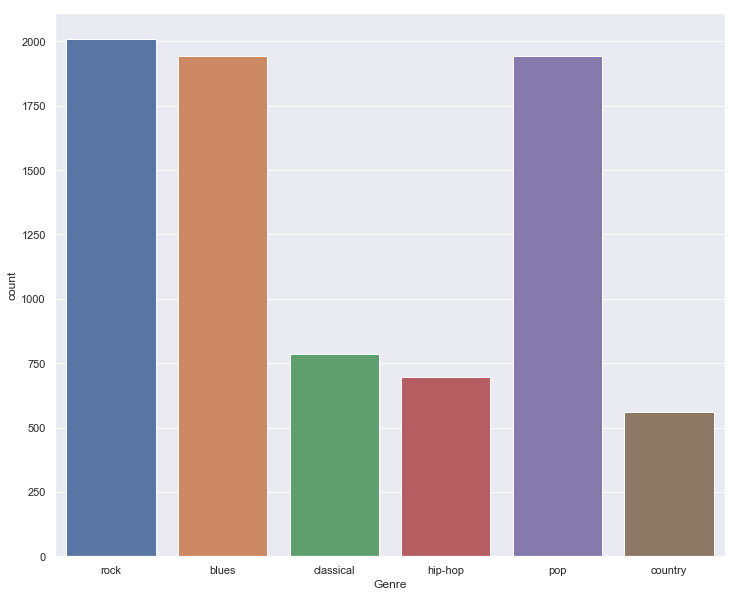

In [5]:
sns.set(rc={'figure.figsize':(12,10)})
music.groupby('Genre').size()
sns.countplot(music['Genre'],label="Count")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025304A35470>],
      dtype=object)

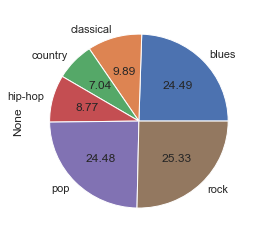

In [6]:
music.groupby('Genre').size().plot(kind='pie', subplots=True, figsize=(4, 4), autopct='%.2f')

Identifying correlation in data graphically:

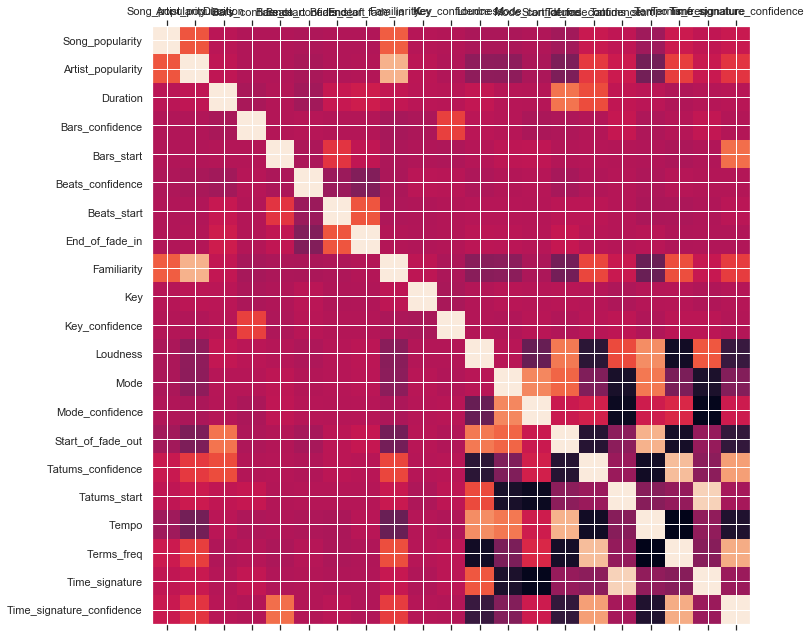

In [7]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(music)

In the above visualization plot, light colour represents maximum correlation and the dark colour represents minimum correlation. We can see none of the variable have proper correlation with any of the other variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253048B3588>,
      dtype=object)

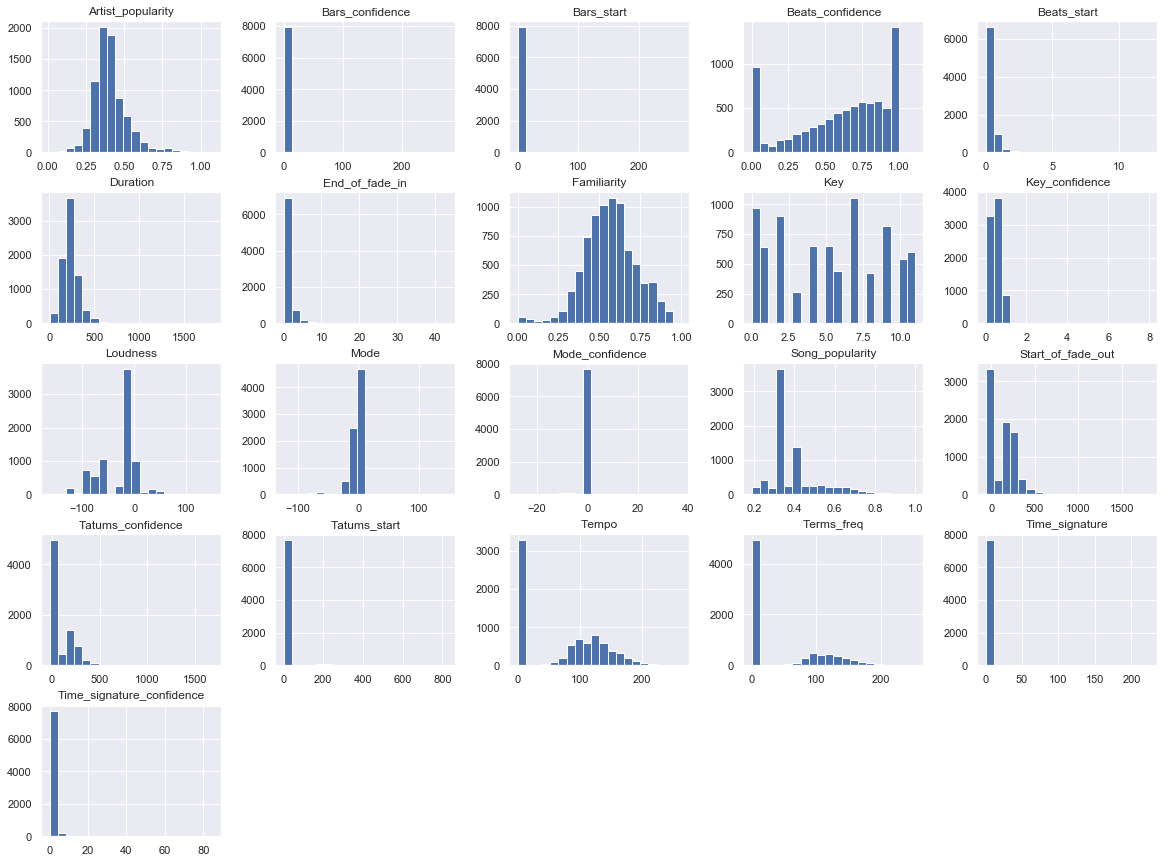

In [8]:
music.hist(figsize=(20,15),bins=20)

# Evaluation Measures for Algorithms

# Random Forest Algorithm

In [9]:
from sklearn.ensemble import RandomForestClassifier

X = music.drop('Genre', axis=1)
y = music['Genre']
from sklearn.model_selection import train_test_split

# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

from sklearn import model_selection

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

# predictions
rfc_predict = rfc.predict(X_test)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Model Accuracy: {0:.2f}".format(accuracy_score(y_test, rfc_predict)))

print("Confusion Matrix")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("Classification Report")
print(classification_report(y_test, rfc_predict))
print('\n')

C:\Users\Astha\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Model Accuracy: 0.40
Confusion Matrix
[[335  43  11  22 118  94]
 [ 79  84   7   6  43  23]
 [ 65  24  27   5  35  34]
 [ 53  10   4  41  64  55]
 [171  50  17  30 259 139]
 [157  16  15  18 153 313]]


Classification Report
             precision    recall  f1-score   support

      blues       0.39      0.54      0.45       623
  classical       0.37      0.35      0.36       242
    country       0.33      0.14      0.20       190
    hip-hop       0.34      0.18      0.23       227
        pop       0.39      0.39      0.39       666
       rock       0.48      0.47      0.47       672

avg / total       0.40      0.40      0.39      2620





In [10]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }

# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the model
rfc_random.fit(X_train, y_train.ravel())

# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 25.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 48.5min finished


{'n_estimators': 1800, 'max_features': 'auto', 'max_depth': 140}


In [12]:
from sklearn.ensemble import RandomForestClassifier

X = music.drop('Genre', axis=1)
y = music['Genre']
from sklearn.model_selection import train_test_split

# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

from sklearn import model_selection

# random forest model creation
rfc = RandomForestClassifier(n_estimators=1800, max_depth=140, max_features='auto')
rfc.fit(X_train,y_train)

# predictions
rfc_predict = rfc.predict(X_test)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Model Accuracy: {0:.2f}".format(accuracy_score(y_test, rfc_predict)))

print("Confusion Matrix")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("Classification Report")
print(classification_report(y_test, rfc_predict))
print('\n')

Model Accuracy: 0.49
Confusion Matrix
[[348  34   5   3 128 105]
 [ 56 103   3   1  54  25]
 [ 57  21  28   0  44  40]
 [ 31   7   0  35  78  76]
 [101  40   5   6 343 171]
 [ 93   5   4   3 141 426]]


Classification Report
             precision    recall  f1-score   support

      blues       0.51      0.56      0.53       623
  classical       0.49      0.43      0.46       242
    country       0.62      0.15      0.24       190
    hip-hop       0.73      0.15      0.25       227
        pop       0.44      0.52      0.47       666
       rock       0.51      0.63      0.56       672

avg / total       0.51      0.49      0.47      2620





# k-NN Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

X=np.array(music.drop(['Genre'],1))
Y=np.array(music['Genre'])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=4)



knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, Y_train)
Y_pred=knn.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

confusion_matrix=confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
print('\n')
print("Classification Report")
#print(classification_report(Y_test, Y_pred))


for k in [5,25,50,100,500,1000,5000]:
    k_value = k
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', algorithm='auto')
    knn.fit(X_train, Y_train)
    Y_pred=knn.predict(X_test)
    print("Accuracy is ", metrics.accuracy_score(Y_test,Y_pred)*100,"% for k-Value:",k_value)

C:\Users\Astha\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.29093198992443325
[[311   3   0   0 256 189]
 [ 92   8   0   0 149  89]
 [ 91   1   0   0  76  59]
 [ 67   1   0   1 112 100]
 [177   5   0   1 342 247]
 [267   4   0   3 263 262]]


Classification Report
('Accuracy is ', 28.620906801007557, '% for k-Value:', 5)
('Accuracy is ', 28.5264483627204, '% for k-Value:', 25)
('Accuracy is ', 30.006297229219143, '% for k-Value:', 50)
('Accuracy is ', 29.093198992443327, '% for k-Value:', 100)
('Accuracy is ', 29.093198992443327, '% for k-Value:', 500)
('Accuracy is ', 28.84130982367758, '% for k-Value:', 1000)


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 4762, n_neighbors = 5000